# Naive Bayes Classification with Python and Scikit-Learn


In this project, I implement Naive Bayes Classification algorithm with Python and Scikit-Learn. I build a Naive Bayes Classifier to predict whether a person makes over 50K a year. I have used the **Adult Data Set** for this project. I have downloaded this dataset from the UCI Machine Learning Repository website.

## Table of Contents

1.	Introduction to Naive Bayes Classification algorithm
2.	Naive Bayes algorithm intuition
3.	The problem statement
4.	Dataset description
5.	Import libraries
6.	Import dataset
7.	Exploratory data analysis
8.	Declare feature vector and target variable
9.	Split data into separate training and test set
10.	Feature engineering
11.	Feature scaling
12.	Model training
13.	Predict the test-set results
14.	Check the accuracy score
15.	Confusion matrix
16.	Classification metrices
17.	Calculate class probabilities
18.	ROC - AUC
19.	k-Fold Cross Validation
20.	Results and conclusion


# Introduction

## 1. Introduction to Naive Bayes Classification algorithm


In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features.  Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.


Naïve Bayes models are also known as `simple Bayes` or `independent Bayes`. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.


## 2. Naive Bayes algorithm intuition


Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the **Maximum A Posteriori (MAP)**.

The **MAP for a hypothesis with 2 events A and B is**

**MAP (A)**

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))


Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.


Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.


In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one.


# 3. The problem statement


In this project, I try to make predictions where the prediction task is to determine whether a person makes over 50K a year. I implement Naive Bayes Classification with Python and Scikit-Learn. So, to answer the question, I build a Naive Bayes classifier to predict whether a person makes over 50K a year.

## 4. Dataset description


I have used the **Adult Data Set** for this project. I have downloaded this dataset from the UCI Machine Learning Repository website. The data set can be found at the following url:-


https://archive.ics.uci.edu/ml/datasets/Adult



## 5. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

# 6. Import dataset

In [6]:
# data = 'C:/datasets/adult.data'
data_path = '/content/adult.data'

df = pd.read_csv(data_path, header=None, sep=',\s')
data = df.copy()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 7. Exploratory data analysis


Now, I will explore the data to gain insights about the data.

In [7]:
# view dimensions of dataset

df.shape

(32561, 15)

We can see that there are 32561 instances and 15 attributes in the data set.

### View top 5 rows of dataset

In [8]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [9]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [10]:
# let's agian preview the dataset

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [11]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that there are no missing values in the dataset. I will confirm this further.

### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.


First of all, I will explore categorical variables.

### Explore categorical variables

In [12]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [13]:
# view the categorical variables

df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


### Summary of categorical variables


- There are 9 categorical variables.


- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.


- `income` is the target variable.

### Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [14]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

We can see that there are no missing values in the categorical variables. I will confirm this further.

### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables.

In [16]:
# view frequency counts of values in categorical variables

for var in categorical:
    # print(df[var].value_counts())
    print(df[var].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' '

In [18]:
# view frequency distribution of categorical variables

for var in categorical:
    # print(var)
    print(df[var].value_counts(normalize=True))
    print("======"*10)

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: proportion, dtype: float64
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: proportion, dtype: float64
marital_status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706


Now, we can see that there are several variables like `workclass`, `occupation` and `native_country` which contain missing values. Generally, the missing values are coded as `NaN` and python will detect them with the usual command of `df.isnull().sum()`.

But, in this case the missing values are coded as `?`. Python fail to detect these as missing values because it do not consider `?` as missing values. So, I have to replace `?` with `NaN` so that Python can detect these missing values.

I will explore these variables and replace `?` with `NaN`.

### Explore workclass variable

In [19]:
# check labels in workclass variable

df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [20]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

We can see that there are 1836 values encoded as `?` in workclass variable. I will replace these `?` with `NaN`.

In [21]:
# replace '?' values in workclass variable with `NaN`


df['workclass'].replace('?', np.NaN, inplace=True)

In [22]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Now, we can see that there are no values encoded as `?` in the `workclass` variable.

I will adopt similar approach with `occupation` and `native_country` column.

### Explore occupation variable

In [23]:
# check labels in occupation variable

df.occupation.unique()


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [24]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

We can see that there are 1843 values encoded as `?` in `occupation` variable. I will replace these `?` with `NaN`.

In [25]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace('?', np.NaN, inplace=True)


In [26]:
# again check the frequency distribution of values in occupation variable

df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

### Explore native_country variable


In [27]:

# check labels in native_country variable

df.native_country.unique()


array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [28]:
# check frequency distribution of values in native_country variable

df.native_country.value_counts()


native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

We can see that there are 583 values encoded as `?` in `native_country` variable. I will replace these `?` with `NaN`.


In [29]:
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace('?', np.NaN, inplace=True)

In [30]:
# again check the frequency distribution of values in native_country variable

df.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

### Check missing values in categorical variables again

In [31]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now, we can see that `workclass`, `occupation` and `native_country` variable contains missing values.

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [32]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


We can see that `native_country` column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

### Explore Numerical Variables

In [33]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [34]:
# view the numerical variables

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### Summary of numerical variables


- There are 6 numerical variables.


- These are given by `age`, `fnlwgt`, `education_num`, `capital_gain`, `capital_loss` and `hours_per_week`.


- All of the numerical variables are of discrete data type.

### Explore problems within numerical variables


Now, I will explore the numerical variables.


### Missing values in numerical variables

In [35]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

We can see that all the 6 numerical variables do not contain missing values.

# 8. Declare independent feature vector and target variable

In [36]:
X = df.drop(['income'], axis=1)

y = df['income']

## 9. Split data into separate training and test set

In [37]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [38]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

# 10. Feature Engineering


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.

In [39]:
# check data types in X_train

X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [40]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [41]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Engineering missing values in categorical variables

In [42]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [43]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [44]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [45]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [46]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [47]:
# check missing values in X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [48]:
# check missing values in X_test

X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

We can see that there are no missing values in X_train and X_test.

## Encode categorical variables

In [50]:
# print categorical variables

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [51]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [54]:
# !pip install category-encoders

In [55]:
# import category encoders

import category_encoders as ce

In [56]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [57]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X_train.shape

(22792, 105)

We can see that from the initial 14 columns, we now have 113 columns.

Similarly, I will take a look at the `X_test` set.

In [59]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_test.shape

(9769, 105)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

# 11. Feature Scaling



In [61]:
cols = X_train.columns

In [62]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [63]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [64]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [65]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have `X_train` dataset ready to be fed into the Gaussian Naive Bayes classifier. I will do it as follows.

# 12. Model training: GaussianNB

In [66]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)


GaussianNB()

## 13. Predict the test set results

In [67]:
y_pred = gnb.predict(X_test)

y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

## 14. Check accuracy score

In [68]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8083


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [69]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [70]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8067


# Check for overfitting and underfitting

---



In [71]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8067
Test set score: 0.8083


The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.


# Compare model accuracy with null accuracy


So, the model accuracy is 0.8083. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [72]:
# check class distribution in test set

y_test.value_counts()

income
<=50K    7407
>50K     2362
Name: count, dtype: int64

We can see that the occurences of most frequent class is 7407. So, we can calculate null accuracy by dividing 7407 by total number of occurences.

In [73]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


We can see that our model accuracy score is 0.8083 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.


We have another tool called `Confusion matrix` that comes to our rescue.

# 15. Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


Thus in binary classification,
- the count of true negatives is C00
- false negatives is C10
- true positives is C11
- false positives is C01

In [74]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5999 1408]
 [ 465 1897]]

True Positives(TP) =  1897

True Negatives(TN) =  5999

False Positives(FP) =  1408

False Negatives(FN) =  465


The confusion matrix shows `5999 + 1897 = 7896 correct predictions` and `1408 + 465 = 1873 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 1897


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 5999


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1408 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 465 `(Type II error)`

<Axes: >

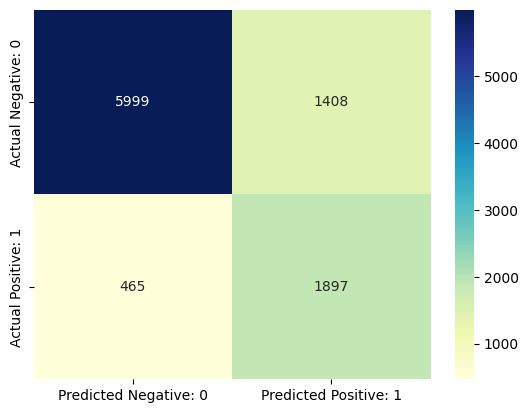

In [75]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Negative: 0', 'Predicted Positive: 1'],
                                 index=['Actual Negative: 0', 'Actual Positive: 1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# 16. Classification metrices

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769



### Classification accuracy

In [77]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [78]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8083


### Classification error

In [79]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1917


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.



In [80]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.5740


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN)`.



In [81]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8031


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [82]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8031


### False Positive Rate

In [83]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1901


### Specificity

In [84]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8099


### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to
compare classifier models, not global accuracy.




### Support


**Support** is the actual number of occurrences of the class in our dataset.

# 17. Calculate class probabilities

In [85]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99999426e-01, 5.74152436e-07],
       [9.99687907e-01, 3.12093456e-04],
       [1.54405602e-01, 8.45594398e-01],
       [1.73624321e-04, 9.99826376e-01],
       [8.20121011e-09, 9.99999992e-01],
       [8.76844580e-01, 1.23155420e-01],
       [9.99999927e-01, 7.32876705e-08],
       [9.99993460e-01, 6.53998797e-06],
       [9.87738143e-01, 1.22618575e-02],
       [9.99999996e-01, 4.01886317e-09]])

### Observations


- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - `<=50K` and `>50K`.

    - Class 0 => <=50K - Class that a person makes less than equal to 50K.    
    
    - Class 1 => >50K  - Class that a person makes more than 50K.
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.    
    
    - Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.    
    


In [86]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999994e-01,5.741524e-07
1,9.996879e-01,3.120935e-04
2,1.544056e-01,8.455944e-01
3,1.736243e-04,9.998264e-01
4,8.201210e-09,1.000000e+00
5,8.768446e-01,1.231554e-01
6,9.999999e-01,7.328767e-08
7,9.999935e-01,6.539988e-06
8,9.877381e-01,1.226186e-02
9,1.000000e+00,4.018863e-09


In [87]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([5.74152436e-07, 3.12093456e-04, 8.45594398e-01, 9.99826376e-01,
       9.99999992e-01, 1.23155420e-01, 7.32876705e-08, 6.53998797e-06,
       1.22618575e-02, 4.01886317e-09])

In [88]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

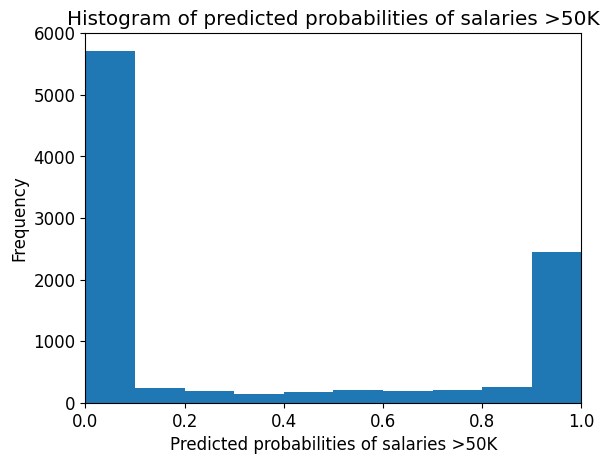

In [89]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

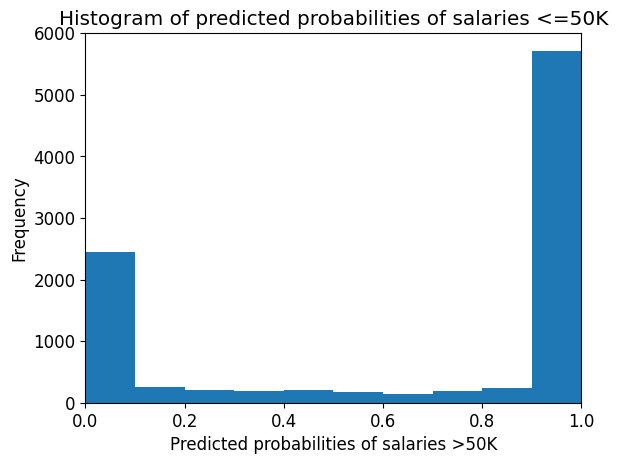

In [91]:
# store the predicted probabilities for class 0 - Prob of - <=50K

y_pred0 = gnb.predict_proba(X_test)[:, 0]

# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred0, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries <=50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

### Observations


- We can see that the above histogram is highly positive skewed.


- The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary
  is <=50K.


- There are relatively small number of observations with probability > 0.5.


- So, these small number of observations predict that the salaries will be >50K.


- Majority of observations predcit that the salaries will be <=50K.

# 18. ROC - AUC



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various
classification threshold levels.



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.




**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



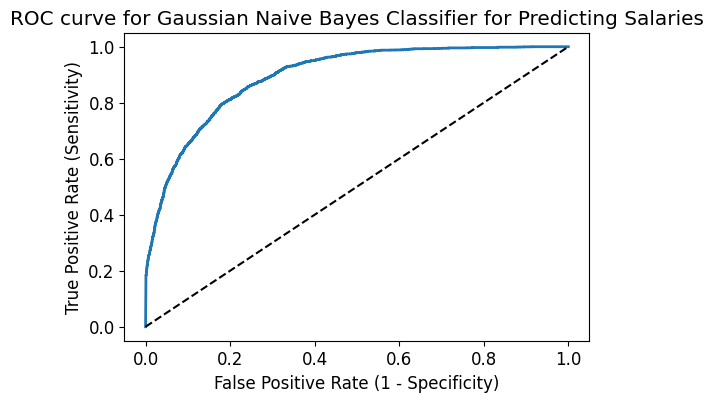

In [92]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [93]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8941


### Interpretation


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [94]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score


Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8938



# 19. k-Fold Cross Validation

In [95]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81359649 0.80438596 0.81175954 0.8056165  0.79596314 0.79684072
 0.81044318 0.81175954 0.80210619 0.81044318]


We can summarize the cross-validation accuracy by calculating its mean.

In [96]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8063


### Interpretation


- Using the mean cross-validation, we can conclude that we expect the model to be around 80.63% accurate on average.

- If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

- Our original model accuracy is 0.8083, but the mean cross-validation accuracy is 0.8063. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

# 20. Results and conclusion


1.	In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year. The model yields a very good performance as indicated by the model accuracy which was found to be 0.8083.
2.	The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.
3.	I have compared the model accuracy score which is 0.8083 with null accuracy score which is 0.7582. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.
4.	ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a person makes over 50K a year.
5.	Using the mean cross-validation, we can conclude that we expect the model to be around 80.63% accurate on average.
6.	If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training.
7.	Our original model accuracy is 0.8083, but the mean cross-validation accuracy is 0.8063. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.